Nama:Angelina Nirmala Puteri Dika Praktiko

NPM : 24083010055

Text(0.5, 1.0, 'quality of life (khusus sehat)')

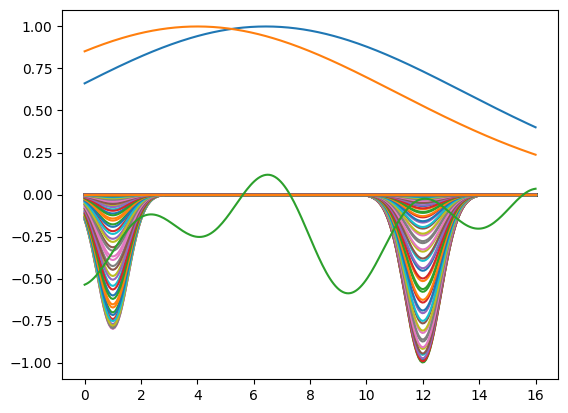

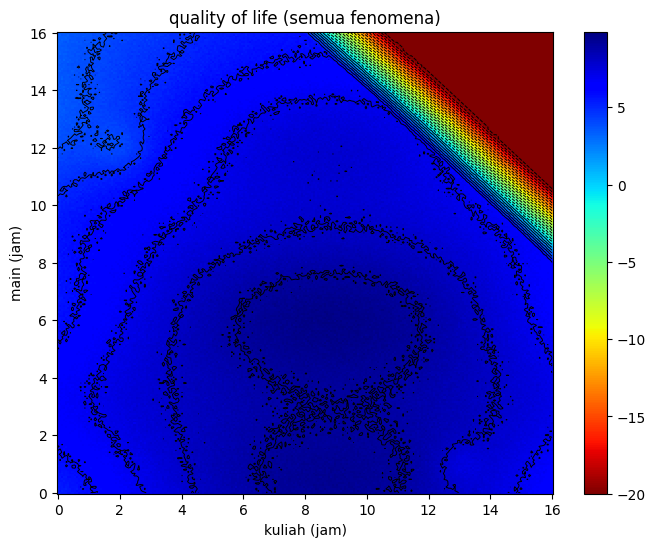

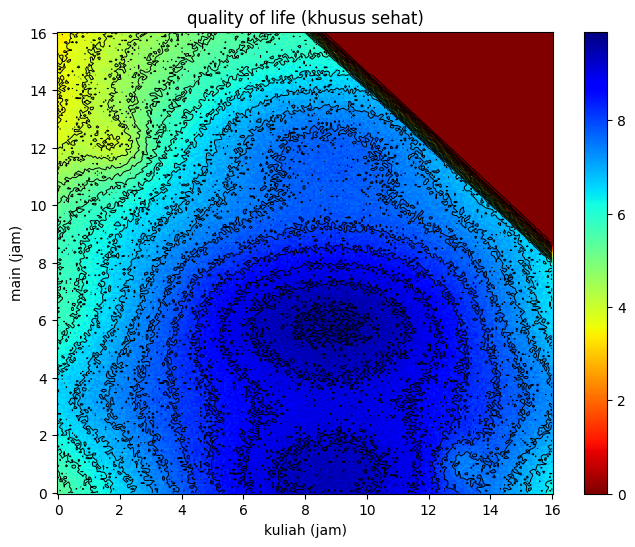

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

istirahat= 8 # istirahat yang cukup

# Grid setup
xmin, xmax, ymin, ymax = 0, 24-istirahat, 0, 24-istirahat
res = 240
x = np.linspace(xmin, xmax, res) # kuliah
y = np.linspace(ymin, ymax, res) # main
X, Y = np.meshgrid(x, y)

# kuliah
plt.plot(x, np.exp(-((x -((45.0/7)))**2) / (10**2))) # kuliah
kuliah_pref = np.exp(-((x -(9.0))**2) / (10**2))

# bermain, game, instagram, tiktok, dlsb
plt.plot(y, np.exp(-((y -4.0)**2) / (10**2))) # main
main_pref = np.exp(-((Y - 4.0)**2) / (10**2))

# kalau total siklus main-kerja lebih dari 24 jam, merusak ritme sirkadian
total_waktu = X + Y
total_penalty = 0.2 * np.exp(total_waktu / 24.0)  # stronger, narrower penalty
#plt.plot(x, -total_penalty)

# terlena
kebanyakan_main = 1 * np.exp(-((X - 2.0)**2 + (Y - 12.0)**2) / 0.8)   # kebanyakan main
plt.plot(x, -kebanyakan_main)
# burnout
kebanyakan_lembur = 0.8 * np.exp(-((X - 13.0)**2 + (Y - 1.0)**2) / 0.6)  # kebanyakan lembur
plt.plot(y, -kebanyakan_lembur )

# naik-turun motivasi harian
NPM = 10055
np.random.seed(NPM)
plt.plot(x, 0.4 * np.sin((0.3 * x)-1) * np.cos(1.0 * y) -0.2)
ripple = 0.4 * np.sin((0.3 * X)-1) * np.cos(1.0 * Y) -0.2
noise = np.random.normal(loc=0.0, scale=0.1, size=X.shape)
ripple += noise

# objective function
# quality of life
# edit preferensi di sini, tiap orang bisa beda prioritas
Z = 10.0 * (0.6 * kuliah_pref + 0.4 * main_pref)
Z = Z - kebanyakan_main - kebanyakan_lembur - total_penalty + ripple

# clip tidak lebih dari 24 jam
Z -= 10.0 * np.maximum(total_waktu - 24.0, 0.0)

# clip fenomena semua
Z_clip = np.clip(Z, -20, 20)
plt.figure(figsize=(8, 6))
c = plt.pcolormesh(X, Y, Z_clip, cmap='jet_r', shading='auto')
contours = plt.contour(X, Y, Z_clip, levels=30, colors='black', linewidths=0.7)
plt.colorbar(c)
plt.xlabel("kuliah (jam)")
plt.ylabel("main (jam)")
plt.title("quality of life (semua fenomena)")

# clip fenomena 'sehat'
Z_clip = np.clip(Z, 0, 10)
plt.figure(figsize=(8, 6))
c = plt.pcolormesh(X, Y, Z_clip, cmap='jet_r', shading='auto')
contours = plt.contour(X, Y, Z_clip, levels=30, colors='black', linewidths=0.7)
plt.colorbar(c)
plt.xlabel("kuliah (jam)")
plt.ylabel("main (jam)")
plt.title("quality of life (khusus sehat)")

# TUGAS
# 1) mainkan paramter-parameter (ambang batas jam, jam istirahat harian, pengali/pembagi eksponen)
# 1a) plot grafik-grafik secara berdampingan untuk membandingkan skalanya
# 2) tambahkan faktor-faktor ke objective function (jika perlu)
# 3) temukan titik optimum sesuai diri masing-masing,
#    temukan secara 'numerik', sebisa mungkin jangan pakai np.argmax
# 4) buat cerita aktivitas harian sesuai, bagaimana agar lebih baik/sehat
#    poin 4 paling penting

# global optimum,
# idx = np.unravel_index(np.argmax(Z_clip), Z_clip.shape)
# opt_x, opt_y, opt_z = X[idx], Y[idx], Z_clip[idx]

#1

##mainkan paramter-parameter (ambang batas jam, jam istirahat harian, pengali/pembagi eksponen)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider

def quality_of_life(istirahat=8, kuliah_center=9, main_center=4,
                    penalty_scale=0.2, burnout_strength=0.8, main_strength=1.0):
    # Grid setup
    xmin, xmax, ymin, ymax = 0, 24-istirahat, 0, 24-istirahat
    res = 240
    x = np.linspace(xmin, xmax, res)
    y = np.linspace(ymin, ymax, res)
    X, Y = np.meshgrid(x, y)

    # preferensi kuliah & main
    kuliah_pref = np.exp(-((X - kuliah_center)**2) / (10**2))
    main_pref   = np.exp(-((Y - main_center)**2) / (10**2))

    # penalti ritme 24 jam
    total_waktu = X + Y
    total_penalty = penalty_scale * np.exp(total_waktu / 24.0)

    # fenomena
    kebanyakan_main = main_strength * np.exp(-((X - 2.0)**2 + (Y - 12.0)**2) / 0.8)
    kebanyakan_lembur = burnout_strength * np.exp(-((X - 13.0)**2 + (Y - 1.0)**2) / 0.6)

    # ripple + noise
    np.random.seed(12391)
    ripple = 0.4 * np.sin((0.3 * X)-1) * np.cos(1.0 * Y) - 0.2
    noise = np.random.normal(loc=0.0, scale=0.1, size=X.shape)
    ripple += noise

    # objective
    Z = 10.0 * (0.6 * kuliah_pref + 0.4 * main_pref)
    Z = Z - kebanyakan_main - kebanyakan_lembur - total_penalty + ripple
    Z -= 10.0 * np.maximum(total_waktu - 24.0, 0.0)

    Z_clip = np.clip(Z, -20, 20)

    # plot
    plt.figure(figsize=(7,5))
    c = plt.pcolormesh(X, Y, Z_clip, cmap='jet_r', shading='auto')
    contours = plt.contour(X, Y, Z_clip, levels=20, colors='black', linewidths=0.7)
    plt.colorbar(c)
    plt.xlabel("kuliah (jam)")
    plt.ylabel("main (jam)")
    plt.title("quality of life")
    plt.show()

# slider interaktif
interact(
    quality_of_life,
    istirahat=FloatSlider(value=8, min=4, max=12, step=1),
    kuliah_center=FloatSlider(value=9, min=4, max=16, step=0.5),
    main_center=FloatSlider(value=4, min=1, max=10, step=0.5),
    penalty_scale=FloatSlider(value=0.2, min=0.05, max=1.0, step=0.05),
    burnout_strength=FloatSlider(value=0.8, min=0.1, max=2.0, step=0.1),
    main_strength=FloatSlider(value=1.0, min=0.1, max=2.0, step=0.1)
)


interactive(children=(FloatSlider(value=8.0, description='istirahat', max=12.0, min=4.0, step=1.0), FloatSlide…

<function __main__.quality_of_life(istirahat=8, kuliah_center=9, main_center=4, penalty_scale=0.2, burnout_strength=0.8, main_strength=1.0)>

Output tersebut merupakan simulasi Quality of Life (QOL) berdasarkan jam kuliah, jam main, dan istirahat. Grafik tersebut berbentuk heatmap: sumbu X=jam kuliah, Y=jam main, warna=tingkat QOL. Warna terang menunjukkan kombinasi seimbang dengan QOL tinggi, sedangkan warna gelap menandakan aktivitas berlebihan atau kurang seimbang. Titik berwarna hitam membantu melihat garis nilai QOL sama. Dengan slider interaktif, dapat mengubah parameternya dan langsung melihat pergeseran pola.

##plot grafik-grafik secara berdampingan untuk membandingkan skalanya

/tmp/ipython-input-3790954115.py:59: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


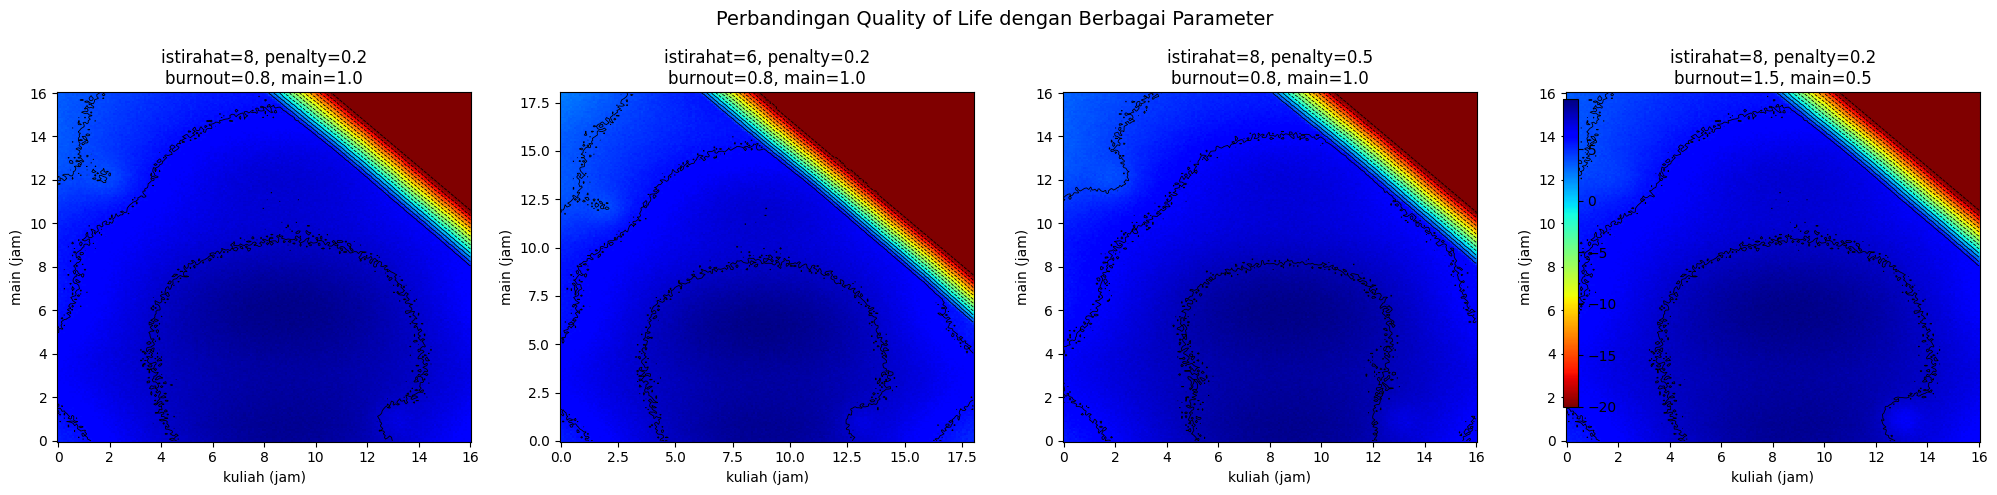

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def quality_of_life(istirahat=8, kuliah_center=9, main_center=4,
                    penalty_scale=0.2, burnout_strength=0.8, main_strength=1.0):
    xmin, xmax, ymin, ymax = 0, 24-istirahat, 0, 24-istirahat
    res = 200
    x = np.linspace(xmin, xmax, res)
    y = np.linspace(ymin, ymax, res)
    X, Y = np.meshgrid(x, y)

    # preferensi kuliah & main
    kuliah_pref = np.exp(-((X - kuliah_center)**2) / (10**2))
    main_pref   = np.exp(-((Y - main_center)**2) / (10**2))

    # penalti ritme
    total_waktu = X + Y
    total_penalty = penalty_scale * np.exp(total_waktu / 24.0)

    # fenomena
    kebanyakan_main = main_strength * np.exp(-((X - 2.0)**2 + (Y - 12.0)**2) / 0.8)
    kebanyakan_lembur = burnout_strength * np.exp(-((X - 13.0)**2 + (Y - 1.0)**2) / 0.6)

    # ripple + noise
    np.random.seed(12391)
    ripple = 0.4 * np.sin((0.3 * X)-1) * np.cos(1.0 * Y) - 0.2
    noise = np.random.normal(loc=0.0, scale=0.1, size=X.shape)
    ripple += noise

    # fungsi objektif
    Z = 10.0 * (0.6 * kuliah_pref + 0.4 * main_pref)
    Z = Z - kebanyakan_main - kebanyakan_lembur - total_penalty + ripple
    Z -= 10.0 * np.maximum(total_waktu - 24.0, 0.0)

    return X, Y, np.clip(Z, -20, 20)

# --- kombinasi parameter untuk dibandingkan ---
param_sets = [
    {"istirahat": 8, "penalty_scale": 0.2, "burnout_strength": 0.8, "main_strength": 1.0},  # baseline
    {"istirahat": 6, "penalty_scale": 0.2, "burnout_strength": 0.8, "main_strength": 1.0},  # kurang tidur
    {"istirahat": 8, "penalty_scale": 0.5, "burnout_strength": 0.8, "main_strength": 1.0},  # lebih sensitif ritme
    {"istirahat": 8, "penalty_scale": 0.2, "burnout_strength": 1.5, "main_strength": 0.5},  # burnout dominan
]

# --- plot berdampingan ---
fig, axes = plt.subplots(1, len(param_sets), figsize=(20, 5))

for ax, params in zip(axes, param_sets):
    X, Y, Z = quality_of_life(**params)
    c = ax.pcolormesh(X, Y, Z, cmap="jet_r", shading="auto")
    ax.contour(X, Y, Z, levels=15, colors="black", linewidths=0.6)
    ax.set_title(f"istirahat={params['istirahat']}, penalty={params['penalty_scale']}\n"
                 f"burnout={params['burnout_strength']}, main={params['main_strength']}")
    ax.set_xlabel("kuliah (jam)")
    ax.set_ylabel("main (jam)")

fig.colorbar(c, ax=axes, shrink=0.8, location='right')
plt.suptitle("Perbandingan Quality of Life dengan Berbagai Parameter", fontsize=14)
plt.tight_layout()
plt.show()


Output tersebut digunakan untuk membandingkan peta QOL dalam empat skenario yang berbeda, dnegan mengubah parameter istirahat, penalti ritme, kekuatan burnout, dan penalti main. Hasil visualisasi menunjukkan bagaiman perubahan gaya hidup atau sensitivitas terhadap aktivitas tertentu memengaruhi titik-titik optimum DOL. contohnya, saat berkurangnya jam tidur dapat membuat ruang aktivitas semakin sempit, penalti ritme yang lebih besar memperketat batas keseimbangan, sedangkan burnout yang dominan menurunkan QOL jika kuliah terlalu lama.

#2. Tambahkan faktor-faktor ke objective function (jika perlu)

#

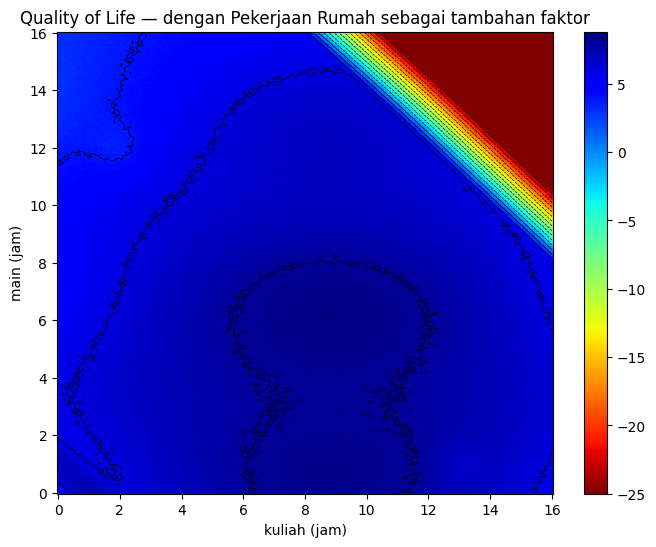

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def quality_of_life_pr(
    istirahat=8,
    kuliah_center=9,
    main_center=4,
    pr_center=1.0,         # optimal pekerjaan rumah 1 jam
    pr_max=2.0,             # maksimal PR sebelum burnout
    penalty_scale=0.2,
    burnout_strength=0.8,
    main_strength=1.0,
    pr_strength=0.8,         # manfaat PR
    sleep_quality=1.0
):
    """
    Returns X, Y, Z_clip with kuliah, main, and pekerjaan rumah as additional factor.
    """
    # Grid setup
    xmin, xmax = 0, max(0, 24 - istirahat)
    ymin, ymax = 0, max(0, 24 - istirahat)
    res = 220
    x = np.linspace(xmin, xmax, res)  # kuliah
    y = np.linspace(ymin, ymax, res)  # main
    X, Y = np.meshgrid(x, y)

    # base preferences
    kuliah_pref = np.exp(-((X - kuliah_center)**2) / (10**2))
    main_pref   = np.exp(-((Y - main_center)**2) / (10**2))

    # pekerjaan rumah: gaussian peak di pr_center
    PR_grid = np.exp(-((X + Y - pr_center)**2) / (0.8**2))  # simple 2D approx

    # penalti total jam
    total_waktu = X + Y + PR_grid
    total_penalty = penalty_scale * np.exp(total_waktu / 24.0)

    # kebanyakan main & lembur
    kebanyakan_main = main_strength * np.exp(-((X - 2.0)**2 + (Y - 12.0)**2) / 0.8)
    kebanyakan_lembur = burnout_strength * np.exp(-((X - 13.0)**2 + (Y - 1.0)**2) / 0.6)

    # penalti burnout PR jika melebihi pr_max
    burnout_PR = pr_strength * np.maximum(PR_grid - pr_max, 0.0)

    # ripple + noise
    np.random.seed(123)
    ripple = 0.35 * np.sin((0.28 * X)-0.9) * np.cos(0.95 * Y) -0.15
    noise = np.random.normal(loc=0.0, scale=0.07, size=X.shape)
    ripple += noise

    # compose objective
    pos = 10.0 * (0.55 * kuliah_pref + 0.35 * main_pref + 0.2 * PR_grid)
    neg = kebanyakan_main + kebanyakan_lembur + total_penalty + burnout_PR

    Z = (pos - neg + ripple) * sleep_quality

    # heavy clip for physically impossible totals
    Z -= 12.0 * np.maximum(total_waktu - 24.0, 0.0)

    Z_clip = np.clip(Z, -25, 25)
    return X, Y, Z_clip

# --- contoh plot ---
X, Y, Z = quality_of_life_pr()
plt.figure(figsize=(8,6))
pcm = plt.pcolormesh(X, Y, Z, cmap="jet_r", shading="auto")
plt.contour(X, Y, Z, levels=16, colors="black", linewidths=0.5)
plt.xlabel("kuliah (jam)")
plt.ylabel("main (jam)")
plt.title("Quality of Life — dengan Pekerjaan Rumah sebagai tambahan faktor")
plt.colorbar(pcm)
plt.show()


Pada jawaban soal nomor 2 ini, digunakan untuk memperluas model QOL dengan menambahkan faktor Pekerjaam Rumah(PR) selain kuliah dan main, Preferensi optimal PR dimodelkan dengan puncak optimalnya di sekitar 1 jam, tetapi jika melebihi batas maksimum (pr_max), akan muncul penaltiburnout. Fungi objektif QOL dihitung dari kombinasi kuliah, main, dan PR, dikurangi penalti seperti kebanyakan main, lembur, kelelahan PR, serta total jam aktivitas. Hasil akhirnya divisualisasikan dalam peta warna yang menunjukkan bagaimana keseimbangan kuliah, main, dan PR memengaruhi kualitas hidup.

#3. Temukan titik optimum sesuai diri masing-masing, temukan secara 'numerik', sebisa mungkin jangan pakai np.argmax

In [5]:
import numpy as np
from scipy.optimize import minimize

def quality_of_life_point(kuliah, main, istirahat, pr,
                          kuliah_center=9, main_center=4, pr_center=1.0,
                          penalty_scale=0.2, burnout_strength=0.8,
                          main_strength=1.0, pr_strength=0.8,
                          sleep_quality=1.0):
    """Hitung QOL di titik (kuliah, main, istirahat, pr)."""
    # preferensi
    kuliah_pref = np.exp(-((kuliah - kuliah_center)**2) / (10**2))
    main_pref   = np.exp(-((main   - main_center)**2) / (10**2))
    pr_pref     = np.exp(-((pr - pr_center)**2) / (1.0**2))

    # penalti waktu total
    total_waktu = kuliah + main + pr
    total_penalty = penalty_scale * np.exp(total_waktu / 24.0)

    # burnout
    kebanyakan_main = main_strength * np.exp(-((kuliah - 2.0)**2 + (main - 12.0)**2) / 0.8)
    kebanyakan_lembur = burnout_strength * np.exp(-((kuliah - 13.0)**2 + (main - 1.0)**2) / 0.6)
    burnout_PR = pr_strength * np.maximum(pr - 2.0, 0.0)  # lebih dari 2 jam PR → burnout

    # ripple kecil
    ripple = 0.3 * np.sin(0.3*kuliah - 1) * np.cos(main) - 0.1

    # QOL total
    qol = 10.0 * (0.5*kuliah_pref + 0.3*main_pref + 0.2*pr_pref)
    qol = (qol - total_penalty - kebanyakan_main - kebanyakan_lembur - burnout_PR + ripple) * sleep_quality

    # penalti kalau total waktu lebih dari 24
    qol -= 15.0 * np.maximum(total_waktu + istirahat - 24.0, 0.0)

    return qol


# fungsi objektif untuk minimisasi (negatif supaya maximize)
def objective(vars):
    kuliah, main, istirahat, pr = vars
    return -quality_of_life_point(kuliah, main, istirahat, pr)


# batasan tiap variabel ≥ 0 dan ≤ 24
bounds = [(0, 24), (0, 24), (0, 24), (0, 24)]

# constraint: jumlah total jam ≤ 24
constraints = ({
    "type": "ineq",
    "fun": lambda v: 24 - (v[0] + v[1] + v[2] + v[3])
})

# starting guess (kuliah=8, main=4, istirahat=8, pr=1)
res = minimize(objective, x0=[8, 4, 8, 1], bounds=bounds, constraints=constraints)

opt_kuliah, opt_main, opt_istirahat, opt_pr = res.x
opt_val = -res.fun

print(f"Optimum numerik:")
print(f"  Kuliah     = {opt_kuliah:.2f} jam")
print(f"  Main       = {opt_main:.2f} jam")
print(f"  Istirahat  = {opt_istirahat:.2f} jam")
print(f"  PR         = {opt_pr:.2f} jam")
print(f"Quality of life = {opt_val:.2f}")


Optimum numerik:
  Kuliah     = 8.79 jam
  Main       = 5.86 jam
  Istirahat  = 7.98 jam
  PR         = 1.00 jam
Quality of life = 9.68


Hasil optimisasi menunjukkan alokasi waktu terbaik adalah sekitar 8,8 jam untuk kuliah, 5,9 jam untuk main, 8 jam istirahat, dan 1 jam pekerjaan rumah. Kombinasi ini memberi quality of life sebesar 9,68, artinya keseimbangan antara belajar, hiburan, istirahat, dan tugas rumah cukup ideal untuk menjaga produktivitas.

#4. Buat cerita aktivitas harian sesuai, bagaimana agar lebih baik/sehat poin 4 paling penting

In [6]:
# Jadwal kuliah nyata per hari
kuliah_schedule = {
    "Senin": [
        ("07.30 – 10.00", "Kelas Matematika Diskrit"),
        ("10.15 – 12.45", "Kelas Aljabar Linier"),
        ("13.15 – 16.00", "Kelas Basis Data Lanjut")
    ],
    "Selasa": [
        ("10.15 – 12.34", "Kelas Analisis Numerik"),
        ("13.15 – 16.00", "Kelas Statistika Regresi")
    ],
    "Rabu": [
        ("12.00 – 14.30", "Kelas Bela Negara"),
        ("14.40 – 16.20", "Kelas Bahasa Indonesia")
    ],
    "Kamis": [
        ("10.15 – 12.45", "Kelas Analisis Data Eksploratif"),
        ("12.45 – 15.30", "Me Time")   # blok main ditambahkan
    ]
}

# Tambahan kegiatan rutin harian
routine_blocks = [
    ("06.00 – 07.00", "Bangun, sarapan, persiapan kuliah"),
    ("17.00 – 18.00", "Makan & istirahat sore"),
    ("18.00 – 22.00", "Belajar mandiri / mengerjakan tugas/bermain"),
    ("22.00 – 06.00", "Tidur)")
]

# Tambahan pekerjaan rumah (PR)
pr_block = [("16.00 – 17.00", "Pekerjaan rumah (bersih-bersih kamar/nyuci/masak)")]

# Print jadwal lengkap terurut
def parse_time_range(time_str):
    # Ambil jam & menit dari string "HH.MM – HH.MM"
    start = time_str.split("–")[0].strip()
    h, m = map(int, start.split("."))
    return h*60 + m  # konversi ke menit

for hari, jadwal in kuliah_schedule.items():
    print(f"\n📅 {hari}")
    # gabung semua blok
    full_schedule = jadwal + pr_block + routine_blocks
    # urutkan berdasarkan jam mulai
    full_schedule_sorted = sorted(full_schedule, key=lambda x: parse_time_range(x[0]))
    # tampilkan
    for waktu, aktivitas in full_schedule_sorted:
        print(f"{waktu} → {aktivitas}")



📅 Senin
06.00 – 07.00 → Bangun, sarapan, persiapan kuliah
07.30 – 10.00 → Kelas Matematika Diskrit
10.15 – 12.45 → Kelas Aljabar Linier
13.15 – 16.00 → Kelas Basis Data Lanjut
16.00 – 17.00 → Pekerjaan rumah (bersih-bersih kamar/nyuci/masak)
17.00 – 18.00 → Makan & istirahat sore
18.00 – 22.00 → Belajar mandiri / mengerjakan tugas/bermain
22.00 – 06.00 → Tidur)

📅 Selasa
06.00 – 07.00 → Bangun, sarapan, persiapan kuliah
10.15 – 12.34 → Kelas Analisis Numerik
13.15 – 16.00 → Kelas Statistika Regresi
16.00 – 17.00 → Pekerjaan rumah (bersih-bersih kamar/nyuci/masak)
17.00 – 18.00 → Makan & istirahat sore
18.00 – 22.00 → Belajar mandiri / mengerjakan tugas/bermain
22.00 – 06.00 → Tidur)

📅 Rabu
06.00 – 07.00 → Bangun, sarapan, persiapan kuliah
12.00 – 14.30 → Kelas Bela Negara
14.40 – 16.20 → Kelas Bahasa Indonesia
16.00 – 17.00 → Pekerjaan rumah (bersih-bersih kamar/nyuci/masak)
17.00 – 18.00 → Makan & istirahat sore
18.00 – 22.00 → Belajar mandiri / mengerjakan tugas/bermain
22.00 – 06.

Jadwal Senin sampai Kamis tersusun seimbang antara kuliah, pekerjaan rumah, istirahat, serta waktu belajar dan bermain. Setiap pagi diawali dengan persiapan sebelum kelas, lalu kegiatan perkuliahan sesuai jadwal kelas yang ada. Sore hari diisi pekerjaan rumah dan makan, sementara malam difokuskan untuk belajar atau hiburan. Khusus Kamis tersedia waktu me time setelah kuliah, sehingga rutinitas tetap produktif namun memberi ruang untuk relaksasi dan menjaga keseimbangan hidup.